# GAN Image Quality Evaluation

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path
from dotenv import load_dotenv

load_dotenv()
DATA_PATH = Path(os.getenv("DATA_PATH"))

## Load rankings

In [5]:
rankings_path = DATA_PATH / "chatbot" / "rankings_k55_top20.csv"
rank = pd.read_csv(rankings_path)

# only top 3 labels
rank = rank[rank["cluster_rank"]<= 3]

# remove factor_lf_ilf
rank = rank.drop("factor_lf_ilf", axis=1)

# group by cluster id, remove cluster_rank col and duplicates
rank["label_name"] = rank.groupby(["cluster_id"])['label_name'].transform(lambda x: ', '.join(x))
rank = rank.drop("cluster_rank", axis=1)
rank = rank.drop_duplicates()

# set new index and rename
rank = rank.set_index("cluster_id")
rank = rank.rename(columns={"label_name": "top 3 labels"})

rank.to_clipboard()

## Load FID scores

In [16]:
fid_path = DATA_PATH / "fid" / "fid-scores.csv"

df = pd.read_csv(fid_path, index_col="cluster_id")

df = df.join(how="inner", other=rank)

df.to_clipboard()

df

,fid_70,fid_71,top 3 labels
cluster_id,,,
0,144,143,Food & Drink
1,133,132,Mobile & Apps
2,111,98,Games & Entertainment
3,107,104,Film & TV
4,103,91,Technology
5,129,125,Fashion
6,153,128,Mobile & Apps
7,123,113,Real Estate
8,119,116,Portfolio


### Additional Stuff

In [15]:
dfc = df.copy()

dfc = dfc.rename(columns={"top 3 labels": "best label"})

dfc = dfc.sort_values("fid_71")

dfc

,fid_70,fid_71,best label
cluster_id,,,
40,97,87,Minimal
31,100,88,Colorful
11,101,88,Illustration
4,103,91,Technology
41,96,91,Video
21,104,93,WebGL
24,99,94,Minimal
39,116,94,Nginx
43,100,95,Technology


### End Additional Stuff

In [9]:
print(f"mean: {df['fid_70'].mean().round(2)}, median: {df['fid_70'].median()}") 
print(f"mean: {df['fid_71'].mean().round(2)}, median: {df['fid_71'].median()}, std: {df['fid_71'].std()}") 

mean: 134.53, median: 126.0
mean: 120.15, median: 116.0, std: 25.54112020935694


## Worst clusters according to FID

In [5]:
# sort descendingly by fid_71 to get worst clusters
df.sort_values(by="fid_71", axis=0, inplace=True, ascending=False)

df[:5]

print(df[:5].to_latex())

\begin{tabular}{lrrl}
\toprule
{} &  fid\_70 &  fid\_71 &                                 top 3 labels \\
cluster\_id &         &         &                                              \\
\midrule
53         &     271 &     200 &  SEO, Magazine / Newspaper / Blog, Wordpress \\
16         &     260 &     193 &       SEO, Games \& Entertainment, E-Commerce \\
28         &     184 &     186 &               Promotional, Other, Fullscreen \\
9          &     204 &     162 &              Institutions, Wordpress, Drupal \\
36         &     154 &     150 &                  Fashion, E-Commerce, Silver \\
\bottomrule
\end{tabular}



## Best clusters according to FID

In [55]:
# sort ascendingly by fid_71 to get worst clusters
df.sort_values(by="fid_71", axis=0, inplace=True, ascending=True)

df[:15]

print(df[:5].append(df[50:]).drop("fid_70", axis=1).to_latex())
print(df[:5].append(df[50:]).to_latex())

\begin{tabular}{lrl}
\toprule
{} &  fid\_71 &                                 top 3 labels \\
cluster\_id &         &                                              \\
\midrule
40         &      87 &          Minimal, Portfolio, Design Agencies \\
31         &      88 &                  Colorful, Animation, Yellow \\
11         &      88 &   Illustration, Colorful, Art \& Illustration \\
4          &      91 &                   Technology, Blue, Colorful \\
41         &      91 &     Video, Big Background Images, Fullscreen \\
36         &     150 &                  Fashion, E-Commerce, Silver \\
9          &     162 &              Institutions, Wordpress, Drupal \\
28         &     186 &               Promotional, Other, Fullscreen \\
16         &     193 &       SEO, Games \& Entertainment, E-Commerce \\
53         &     200 &  SEO, Magazine / Newspaper / Blog, Wordpress \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrl}
\toprule
{} &  fid\_70 &  fid\_71 &                             

## FID across all classes

In [8]:
# sort ascending by class
df.sort_values(by="cluster_id", axis=0, inplace=True, ascending=True)

df[:3]

,fid_70,fid_71,top 3 labels
cluster_id,,,
0,144,143,"Food & Drink, E-Commerce, Scrolling"
1,133,132,"Mobile & Apps, App Style, Technology"
2,111,98,"Games & Entertainment, Art & Illustration, Ill..."


25.54112020935694


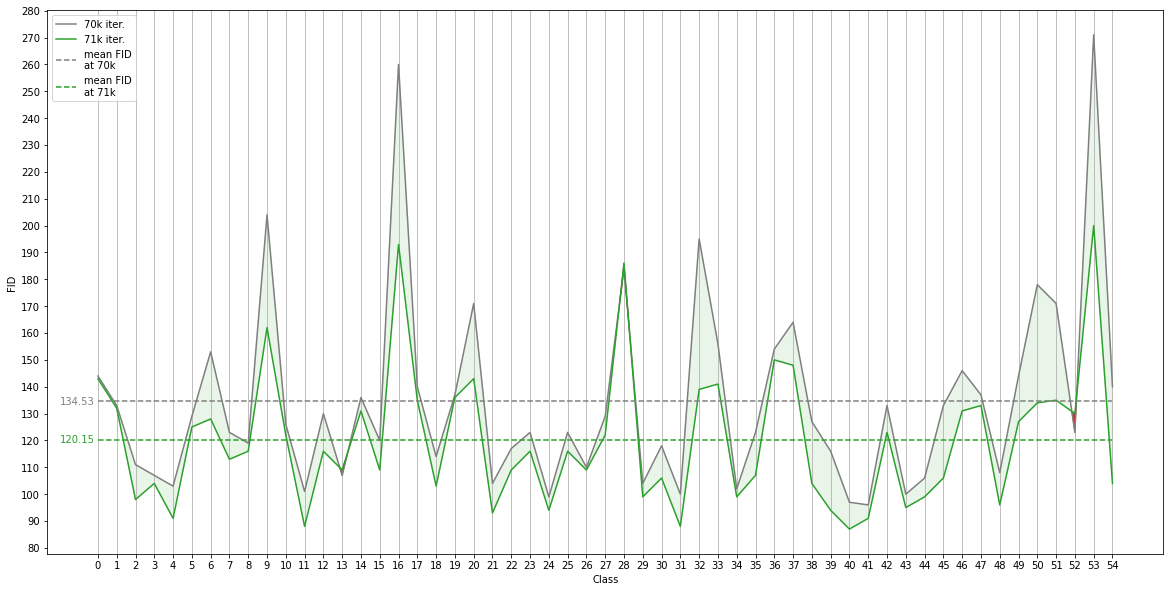

In [54]:
fig, ax = plt.subplots(figsize=(20,10))

# fill NaN values
# df.interpolate("pad", inplace=True)

fid70 = df["fid_70"]
fid71 = df["fid_71"]

ax.set_xticks(df.index)
ax.set_yticks(range(80, 281, 10))

# fid 70
df.plot(y="fid_70",use_index=True, ax=ax, color="tab:grey", label="70k iter.", ylabel="FID")

# fid 71
df.plot(y="fid_71",use_index=True, ax=ax, color="tab:green", label="71k iter.", xlabel="Class")

# fill increase area green
ax.fill_between(df.index, fid70, fid71, where=fid71<=fid70, interpolate=True, alpha=0.1, color="tab:green")


# fill decrease area red
ax.fill_between(df.index,fid70, fid71, where=fid71>fid70, alpha=1.0, interpolate=True, color="tab:red")

# average fid @70
ax.plot([fid70.mean()] * 55, color="tab:grey", linestyle="dashed", label="mean FID\nat 70k")
ax.text(s=fid70.mean().round(2),x=-2, y=fid70.mean()-1, color="tab:grey")

# average fid @71
ax.plot([fid71.mean()] * 55, color="tab:green", linestyle="dashed", label="mean FID\nat 71k")
ax.text(s=fid71.mean().round(2),x=-2.0, y=fid71.mean()-1, color="tab:green")

plt.legend()

# add grid to x-axis
ax.xaxis.grid(True)

print(fid71.std())

## Save fig

In [53]:
fig_path = DATA_PATH / "fid"
filename = "fid-scores.jpg"


fig.savefig(fig_path / filename)